# 1장. 왜 금융분석에 파이썬을 사용하는가?

### One period MC Call option price

In [1]:
S0 =100; K = 105; T = 1; r = 0.05; sigma = 0.2

import numpy as np
I = 100000
z = np.random.randn(I)
ST = S0 * np.exp((r - sigma**2/2)*T + sigma*np.sqrt(T)*z)

In [2]:
C0 = ((ST-K) * (ST-K > 0)).mean() * np.exp(-r*T)
C0

8.037363329844469

In [3]:
hT = np.maximum(ST-K,0) ## payoff at maturity
C0 = np.exp(-r*T) * (sum(hT) / I)
C0

8.037363329844478

In [4]:
print("Value of the European Call Option: %5.3f" % C0)

Value of the European Call Option: 8.037


In [4]:
import datetime as dt

In [8]:
import numpy as np
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web

In [22]:
raw = pd.read_csv('source/tr_eikon_eod_data.csv',
                 index_col = 0, parse_dates = True)
#parse_dates를 True로 함으로써 index를 날짜로 인식하게 한다.
raw.head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82
2010-01-08,30.282827,30.660,20.83,133.52,174.31,114.57,1144.98,18.13,1.4412,1136.10,49.84,111.37


In [21]:
raw.head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82
2010-01-08,30.282827,30.660,20.83,133.52,174.31,114.57,1144.98,18.13,1.4412,1136.10,49.84,111.37


In [31]:
amzn = pd.DataFrame(raw["AMZN.O"])
amzn.columns = ['Close'] #column명을 'Close'로 변경.
amzn.tail()

,Close
Date,
2017-10-25,972.91
2017-10-26,972.43
2017-10-27,1100.95
2017-10-30,1110.85
2017-10-31,1105.28


In [38]:
amzn['Log_Ret'] = np.log(amzn['Close']/amzn['Close'].shift(1))
amzn['Volatility'] = amzn['Log_Ret'].rolling(window=252).std() * np.sqrt(252)
amzn.tail()

,Close,Log_Ret,Volatility
Date,,,
2017-10-25,972.91,-0.003069,0.190374
2017-10-26,972.43,-0.000493,0.189716
2017-10-27,1100.95,0.124131,0.226266
2017-10-30,1110.85,0.008952,0.219826
2017-10-31,1105.28,-0.005027,0.219344


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000D0C3F8D080>,
      dtype=object)

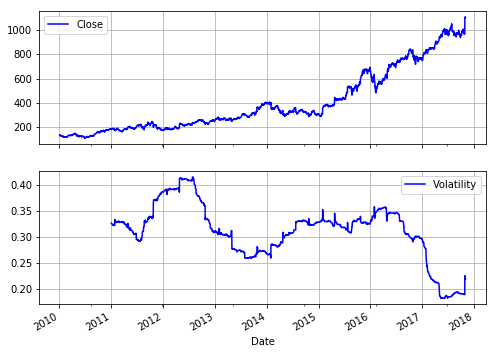

In [41]:
%matplotlib inline
amzn[['Close', 'Volatility']].plot(subplots = True, color ='blue',
                                  figsize=(8,6), grid=True)

In [ ]:
loops = 